# Explanatory Data Analysis Challenge (Olympic Games)

## Data Import and Inspection

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__) and Inspect! 

In [1]:
import pandas as pd
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [2]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [3]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [4]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

In [5]:
olympics = summer.merge(winter, how = "outer", indicator = "Season").replace(to_replace = ["left_only", "right_only"], value = ["Summer", "Winter"])
olympics.rename(columns = {"Country":"Code"}, inplace = True)
olympics

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer
...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter
36933,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter


In [6]:
olympics = olympics.merge(dic.iloc[:, :2], how = "left", left_on = "Code", right_on = "Code")

## Data Cleaning (Part 1)

1. If you haven´t done it yet: Assign appropriate __Column Headers__ to Country Codes (e.g. __"Code"__) and full Country Names (e.g. __"Country"__).
2. __Remove Spaces__ from column headers in olympics and dictionary.
3. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values! (Alternatively, you can find a Solution for this at the end of this Notebook!) 

In [7]:
dic.rename(columns = {"GDP per Capita":"GDPpC"}, inplace = True)
olympics.Code[olympics.Country.isnull()].unique()
missing_C_index = olympics.loc[olympics.Country.isnull()].index
missing_C_index

Int64Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,
              260,
            ...
            33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979,
            33980],
           dtype='int64', length=6367)

Missing values are {"ZZX":"Mixed Team", "BOH":"Bohemia", "ANZ":"Australasia", "RU1":"Russian Empire", "TCH":"Czechoslovakia", "YUG":"Yugoslavia", "ROU":"Romania", "URS":"Soviet Union", "EUA":"United Team of Germany", "BWI":"British West Indies", "GDR":"East Germany", "FRG":"West Germany", "EUN":"Unified Team", "IOP":"Independent Olympic Participants", "SRB":"Serbia", "TTO":"Trinidad and Tobago", "MNE":"Montenegro", "SGP":"Singapore"}

In [8]:
olympics.loc[missing_C_index, "Code"].map({"ZZX":"Mixed Team", "BOH":"Bohemia", "ANZ":"Australasia", "RU1":"Russian Empire", "TCH":"Czechoslovakia", "YUG":"Yugoslavia", "ROU":"Romania", "URS":"Soviet Union", "EUA":"United Team of Germany", "BWI":"British West Indies", "GDR":"East Germany", "FRG":"West Germany", "EUN":"Unified Team", "IOP":"Independent Olympic Participants", "SRB":"Serbia", "TTO":"Trinidad and Tobago", "MNE":"Montenegro", "SGP":"Singapore"})

132          Mixed Team
133          Mixed Team
134          Mixed Team
135          Mixed Team
136          Mixed Team
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [9]:
olympics.Country.fillna(olympics.Code.map({"ZZX":"Mixed Team", "BOH":"Bohemia", "ANZ":"Australasia", "RU1":"Russian Empire", "TCH":"Czechoslovakia", "YUG":"Yugoslavia", "ROU":"Romania", "URS":"Soviet Union", "EUA":"United Team of Germany", "BWI":"British West Indies", "GDR":"East Germany", "FRG":"West Germany", "EUN":"Unified Team", "IOP":"Independent Olympic Participants", "SRB":"Serbia", "TTO":"Trinidad and Tobago", "MNE":"Montenegro", "SGP":"Singapore"}), inplace = True)
olympics.loc[missing_C_index]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season,Country
132,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Summer,Mixed Team
133,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Summer,Mixed Team
134,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Summer,Mixed Team
135,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Summer,Mixed Team
136,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Summer,Mixed Team
...,...,...,...,...,...,...,...,...,...,...,...
33961,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Winter,Unified Team
33977,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Winter,Czechoslovakia
33978,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Winter,Czechoslovakia
33979,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Winter,Czechoslovakia


## Data Cleaning (Part 2)

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)
2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [10]:
from pandas.api.types import CategoricalDtype
olympics.dropna(subset = ["Code"], inplace = True)
cat_type = CategoricalDtype(categories = ["Gold", "Silver", "Bronze"], ordered = True)
olympics.Medal = olympics.Medal.astype(cat_type)
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Year        36931 non-null  int64   
 1   City        36931 non-null  object  
 2   Sport       36931 non-null  object  
 3   Discipline  36931 non-null  object  
 4   Athlete     36931 non-null  object  
 5   Code        36931 non-null  object  
 6   Gender      36931 non-null  object  
 7   Event       36931 non-null  object  
 8   Medal       36931 non-null  category
 9   Season      36931 non-null  object  
 10  Country     36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 3.1+ MB


## What are the most successful countries of all times?

For the next questions, use Seaborn plots.
1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
olympics["Count"] = 1
total_medals = olympics.loc[:, ["Country", "Medal", "Count"]].groupby(by = ["Country", "Medal"]).sum().unstack().fillna(0).droplevel(level = 0, axis = 1).sort_values(by = ["Gold", "Silver", "Bronze"], ascending = False)
total_medals.head(10)

Medal,Gold,Silver,Bronze
Country,,,
United States,2402.0,1571.0,1265.0
Soviet Union,1088.0,724.0,677.0
Germany,589.0,504.0,572.0
United Kingdom,580.0,632.0,587.0
Italy,534.0,473.0,481.0
Sweden,476.0,496.0,505.0
Canada,470.0,435.0,369.0
France,444.0,526.0,578.0
Hungary,412.0,320.0,359.0


In [13]:
top_10 = olympics.Country.value_counts().head(10)
top_10

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Country, dtype: int64

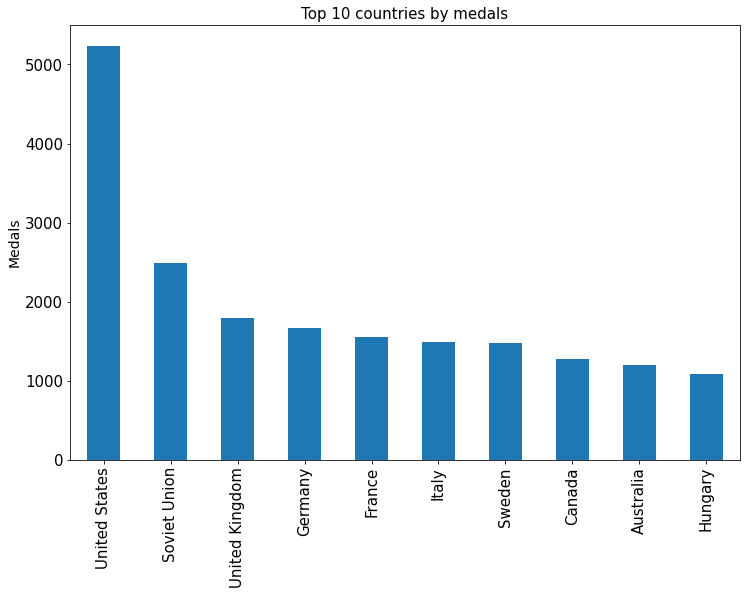

In [14]:
top_10.plot(kind = "bar", fontsize = 15, figsize = (12,8))
plt.title("Top 10 countries by medals", fontsize = 15)
plt.ylabel("Medals", fontsize = 14)
plt.show()

In [15]:
olympics_10 = olympics[olympics.Country.isin(top_10.index)]
olympics_10

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season,Country,Count
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,1
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Summer,Hungary,1
11,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,Summer,United States,1
12,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Summer,Hungary,1
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,Summer,United States,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36928,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Winter,Germany,1
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter,United Kingdom,1
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter,United States,1
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter,Canada,1


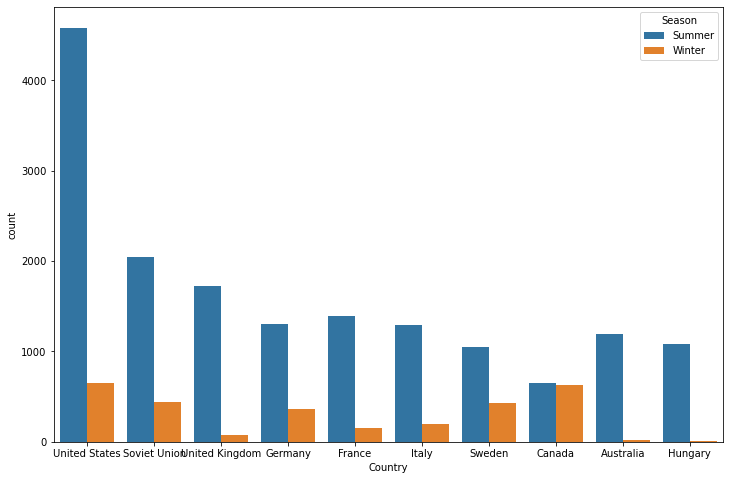

In [16]:
plt.figure(figsize = (12,8))
sns.countplot(data = olympics_10, x = "Country", hue = "Season", order = top_10.index)
plt.show()

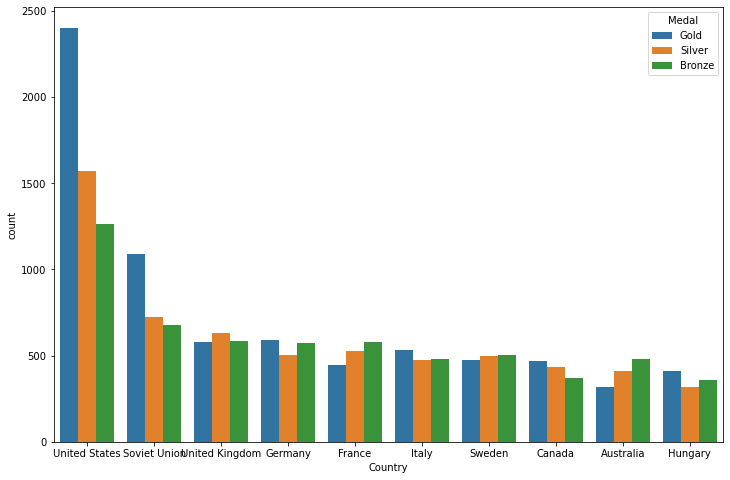

In [17]:
plt.figure(figsize = (12,8))
sns.countplot(data = olympics_10, x = "Country", hue = "Medal", order = top_10.index)
plt.show()

## Do GDP, Population and Politics matter?

1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

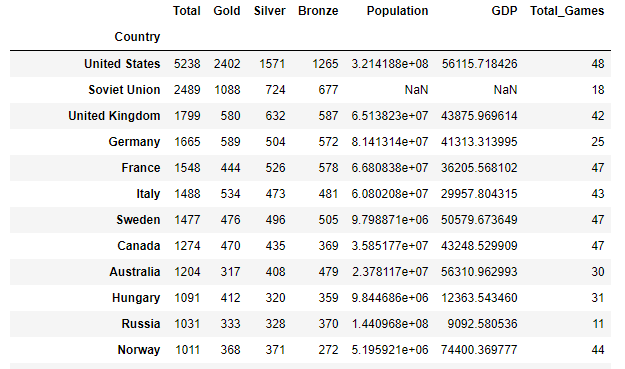

In [18]:
medals_per_country = pd.crosstab(index = olympics.Country, columns = olympics.Medal, margins = True, margins_name = "Total").drop("Total", axis = 0)
medals_per_country = medals_per_country[["Total", "Gold", "Silver", "Bronze"]].sort_values(by = ["Total", "Gold", "Silver", "Bronze"], ascending = False)
medals_per_country.head(50)

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
Italy,1488,534,473,481
Sweden,1477,476,496,505
Canada,1274,470,435,369
Australia,1204,317,408,479


In [19]:
medals_per_country = medals_per_country.merge(dic, how = "left", left_on = "Country", right_on = "Country").drop(columns = ["Code"]).set_index("Country")
medals_per_country

,Total,Gold,Silver,Bronze,Population,GDPpC
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Germany,1665,589,504,572,81413145.0,41313.313995
France,1548,444,526,578,66808385.0,36205.568102
...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388
Macedonia,1,0,0,1,2078453.0,4852.657848
Mauritius,1,0,0,1,1262605.0,9252.110724


In [20]:
olympics["Games"] = olympics.apply(lambda x: str(x.Year) + " " + x.City, axis = 1)

In [21]:
olympics.groupby("Country").apply(lambda x: x.Games.nunique())

Country
Afghanistan         2
Algeria             6
Argentina          18
Armenia             4
Australasia         2
                   ..
Virgin Islands*     1
West Germany       12
Yugoslavia         18
Zambia              2
Zimbabwe            3
Length: 145, dtype: int64

In [22]:
medals_per_country["Total_Games"] = olympics.groupby("Country").apply(lambda x: x.Games.nunique())

In [23]:
medals_per_country.head(50)

,Total,Gold,Silver,Bronze,Population,GDPpC,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,3.214188e+08,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,6.513823e+07,43875.969614,42
Germany,1665,589,504,572,8.141314e+07,41313.313995,25
France,1548,444,526,578,6.680838e+07,36205.568102,47
Italy,1488,534,473,481,6.080208e+07,29957.804315,43
Sweden,1477,476,496,505,9.798871e+06,50579.673649,47
Canada,1274,470,435,369,3.585177e+07,43248.529909,47
Australia,1204,317,408,479,2.378117e+07,56310.962993,30


2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable (see screenshot). Ranks are more meaningful than absolute numbers.

In [24]:
medals_per_country.rank(ascending = False)

,Total,Gold,Silver,Bronze,Population,GDPpC,Total_Games
Country,,,,,,,
United States,1.0,1.0,1.0,1.0,3.0,7.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,28.0
United Kingdom,3.0,4.0,3.0,3.0,20.0,13.0,10.0
Germany,4.0,3.0,5.0,5.0,15.0,18.0,19.0
France,5.0,8.0,4.0,4.0,19.0,22.0,3.0
...,...,...,...,...,...,...,...
Iraq,133.5,122.5,135.0,114.5,34.0,76.0,131.0
Macedonia,133.5,122.5,135.0,114.5,108.0,77.0,131.0
Mauritius,133.5,122.5,135.0,114.5,115.0,54.0,131.0


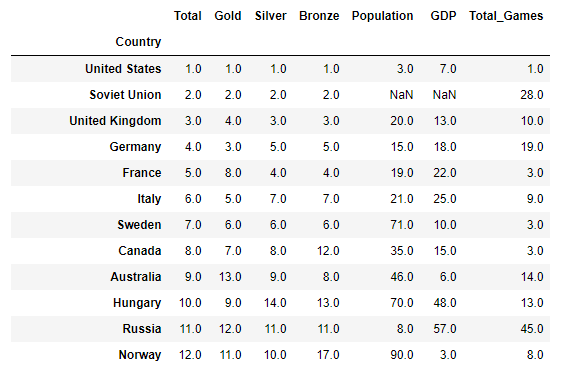

## Statistical Analysis and Hypothesis Testing with scipy

In the follwing work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation)

Missed this section, but can be seen in the solution page.

## Aggregating and Ranking

Create the following __Seaborn Heatmap__ with __Medal Ranks__ for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women).

In [39]:
olympics.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season,Country,Count,Games
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,1,1896 Athens
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria,1,1896 Athens
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece,1,1896 Athens
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece,1,1896 Athens
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece,1,1896 Athens


In [134]:
summary = olympics.groupby(["Country", "Gender", "Season"]).sum().drop(columns = "Year").unstack().unstack().fillna(0)
summary["Total"] = olympics.groupby(["Country", "Gender", "Season"]).sum().drop(columns = "Year").unstack().unstack().fillna(0).agg("sum", axis = 1)
summary = summary.rank(ascending = False).sort_values("Total", ascending = True)
# Solution shows better to use CrossTab

In [95]:
olympics.groupby(["Country", "Season"]).sum().drop(columns = "Year").unstack().fillna(0)
summary2 = olympics.groupby(["Country", "Season"]).sum().drop(columns = "Year").unstack().fillna(0)
summary2["Total"] = olympics.groupby(["Country", "Season"]).sum().drop(columns = "Year").unstack().fillna(0).agg("sum", axis = 1)

summary3 = olympics.groupby(["Country", "Gender"]).sum().drop(columns = "Year").unstack().fillna(0)

summary_new = summary2.merge(summary3, how = "left", on = "Country").droplevel(0, axis = 1).rename(columns = {"":"Total"}).loc[:, ["Women", "Men", "Summer", "Winter","Total"]]
summary_new = summary_new.rank(ascending = False).sort_values("Total", ascending = True)

In [101]:
summary_new.T

Country,United States,Soviet Union,United Kingdom,Germany,France,Italy,Sweden,Canada,Australia,Hungary,...,Eritrea,Gabon,Grenada,Guatemala,Tonga,Togo,Mauritius,Macedonia,United Arab Emirates,Guyana
Season,,,,,,,,,,,,,,,,,,,,,
Women,1.0,2.0,11.0,4.0,16.5,18.0,16.5,7.0,5.0,14.0,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0
Men,1.0,2.0,3.0,7.0,4.0,5.0,6.0,9.0,12.0,8.0,...,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0
Summer,1.0,2.0,3.0,5.0,4.0,6.0,9.0,15.0,7.0,8.0,...,132.5,132.5,132.5,132.5,132.5,132.5,132.5,132.5,132.5,132.5
Winter,1.0,4.0,19.0,7.0,14.0,11.0,6.0,2.0,27.0,30.0,...,95.5,95.5,95.5,95.5,95.5,95.5,95.5,95.5,95.5,95.5
Total,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,133.5,133.5,133.5,133.5,133.5,133.5,133.5,133.5,133.5,133.5


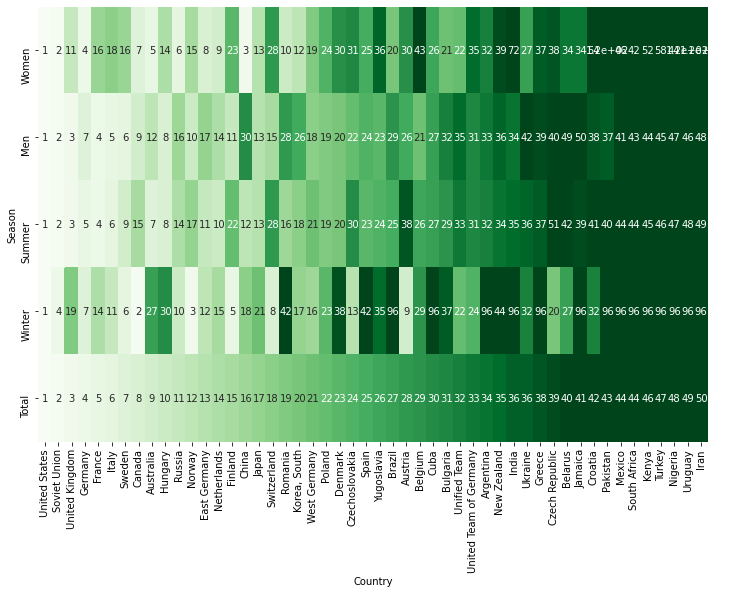

In [135]:
plt.figure(figsize = (12,8))
sns.heatmap(summary_new.head(50).T, cmap = "Greens", annot = True, vmax = 40, cbar = False, yticklabels = ["Women", "Men", "Summer", "Winter", "Total"])
plt.show()

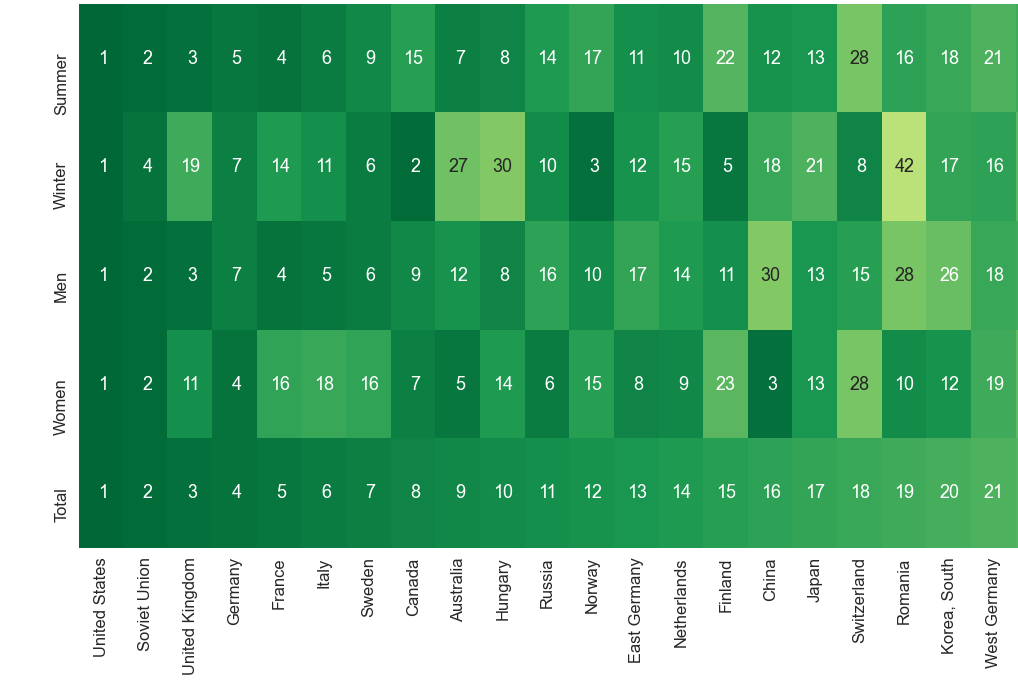

## Summer Games vs. Winter Games - does Geographical Location matter?

__Identify Countries__ that are 
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__


What could be the reasons?

Answer: Most likely access to snow is a big factor! For example, the UK does disproportionately badly in the winder olympics, likely due to a lack of national snow, although France and Italy have snow and are also not proportionally good. The most disporportionately good Winter countries tend to be small and very cold, (Scandinavia/Switzerland).

## Men vs. Women - does Culture & Religion matter?

__Identify Countries__ where
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful

What could be the reasons?

Answer: From the top 20 countries I cannot see any that have significant gender based religeous impediments to sport access - it would be interesting to see stats on countries with a religeous government. However many wealthier nations with nominally secular governments still have quite a disparity between genders, usually steeped in favour of men, implying a gender bias in sports, possibly fuelled by the better pay afforded to professional men in sports. China has the most disproportionaly favorable stats for women, with Russia also having quite a positive one, implying that perhaps notionally communist countries have better gender-based access to sports.

## Do Traditions matter?

Create the following __Seaborn Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

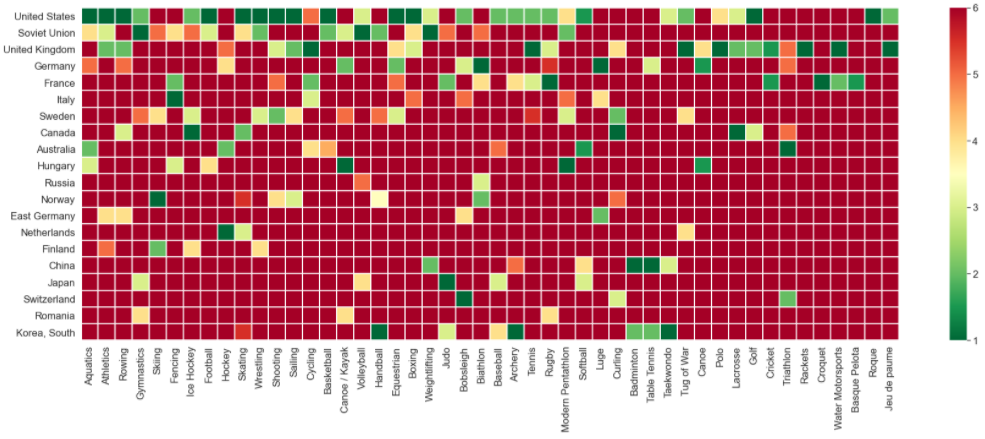

In [102]:
olympics.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season,Country,Count,Games
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,1,1896 Athens
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria,1,1896 Athens
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece,1,1896 Athens
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece,1,1896 Athens
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece,1,1896 Athens


In [130]:
oly_sports = olympics.groupby(["Country", "Sport"]).sum().drop(columns = "Year").unstack().fillna(0)
oly_sports["Total"] = oly_sports.agg("sum", axis = 1)
oly_sports = oly_sports.sort_values(by = "Total", ascending = False).droplevel(0, axis = 1)
oly_sports.head(20)

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling,
Country,,,,,,,,,,,,,,,,,,,,,
United States,1184.0,55.0,994.0,0.0,68.0,318.0,0.0,0.0,93.0,111.0,...,0.0,8.0,54.0,1.0,15.0,114.0,0.0,43.0,129.0,5238.0
Soviet Union,190.0,7.0,238.0,0.0,0.0,146.0,0.0,37.0,8.0,51.0,...,0.0,0.0,0.0,0.0,0.0,144.0,0.0,62.0,116.0,2489.0
United Kingdom,142.0,13.0,295.0,4.0,0.0,0.0,0.0,0.0,20.0,53.0,...,0.0,3.0,61.0,2.0,43.0,0.0,4.0,7.0,17.0,1799.0
Germany,176.0,6.0,107.0,0.0,0.0,0.0,0.0,80.0,66.0,22.0,...,10.0,2.0,13.0,2.0,0.0,4.0,0.0,20.0,24.0,1665.0
France,110.0,46.0,106.0,0.0,0.0,38.0,2.0,44.0,4.0,19.0,...,3.0,6.0,30.0,0.0,6.0,0.0,1.0,15.0,17.0,1548.0
Italy,127.0,15.0,72.0,0.0,0.0,23.0,0.0,10.0,33.0,47.0,...,0.0,3.0,1.0,0.0,0.0,59.0,0.0,14.0,20.0,1488.0
Sweden,101.0,2.0,103.0,0.0,0.0,0.0,0.0,16.0,0.0,11.0,...,3.0,0.0,14.0,1.0,8.0,0.0,0.0,4.0,84.0,1477.0
Canada,119.0,0.0,84.0,0.0,0.0,9.0,0.0,3.0,22.0,17.0,...,0.0,2.0,2.0,2.0,0.0,2.0,0.0,3.0,16.0,1274.0
Australia,400.0,2.0,84.0,0.0,24.0,60.0,0.0,0.0,0.0,4.0,...,0.0,2.0,9.0,5.0,0.0,4.0,0.0,4.0,3.0,1204.0


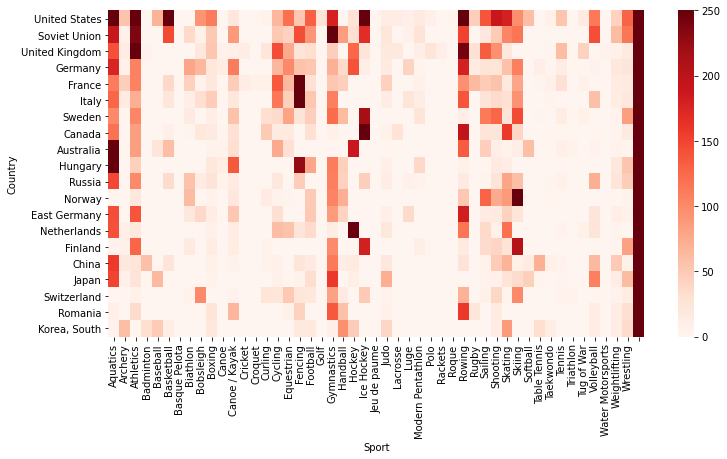

In [133]:
plt.figure(figsize = (12,6))
sns.heatmap(oly_sports.head(20), cmap = 'Reds', vmax = 250)
plt.show()

# Missing full Country Names (see Data Cleaning Part 1)

In [ ]:
{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}